<a href="https://colab.research.google.com/github/genesispah/Clase2Ap/blob/main/Anal%C3%ADtica_auditor%C3%ADa_CMM_Paraguay_Jun_2024_(Informe_ficticio).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="https://drive.google.com/uc?id=1vZQnKCofReo2EPNsgEOAkEt_jQwVfprs" width="310"></center>


# **Auditoría - Operaciones**

---


*Primer cuatrimestre de 2024*

---


País: Paraguay

# Motivación

A partir del análisis de resultados de las actividades de la empresa en Latam durante el primer cuatrimestre de 2024, se comprobó que las operaciones en Paraguay mostraron ganancias bajas en proporción con la inversión realizada en este país.


Se informó que esto no estaría relacionado con shocks económicos de la economía en general, por lo que se priorizó la realización de esta auditoría de la estrategia empresarial para encontrar cuál fue la falla.

El análisis se hizo contando con la siguiente información:

*   Ventas por material de construcción y distribuidor.
*   Exportaciones de CMM a Paraguay por material de construcción y distribuidor.
*   Localidades en Paraguay con presencia o no de distribuidores, y detalle de actividades económicas.
*   Distribuidores con información del rubro y año de experiencia en el mercado.

# Importación, limpieza y modelado de datos

Antes de comenzar con el análisis, se importaron librerías de Python para llevarlo a cabo y, luego, se importaron las bases de datos desde Google Sheets.

In [ ]:
# Importamos las librerías de Python.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# Obtención de los datos.
ID_planilla = '1dvG69vGaBaNIm3fwdpfFBYaX8MvO91lluvtGH2Dxp6E'

URL = f'https://docs.google.com/spreadsheets/d/{ID_planilla}/gviz/tq?tqx=out:csv&sheet='




---


En el caso de la base de **ventas** (sales):

1.   Se importó al Google Colab.
2.   Se revisó por columnas los tipos de datos para saber cómo los interpreta el programa.
3.   Se corrigió el formato y los tipos de datos (distributor: entero (int); columnas de productos: decimal (float)).
4.   Se eliminó la última fila (Total) para que no se duplique el resultado de las sumas por columnas.
5.   Se chequeó si hay datos duplicados.



---



In [ ]:
# Tabla de datos traida de Google sheets mediante la URL + nombre de la hoja.
sales = pd.read_csv(URL + 'sales_in_Paraguay')
display(sales)

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583.00,"$54.510.203,61","$45.268.636,86","$51.579.748,25","$21.780.180,58","$26.576.776,52","$0,00","$55.872.547,77","$18.050.385,12","$178.927.599,01","$2.788,80","$54.510.203,61","$20.982,80"
1,"1,104.00","$32.438.788,20","$25.837.100,49","$36.603.264,50","$21.883.374,92","$1.473.437,08","$0,00","$46.239.695,30","$33.102.840,61","$35.563.624,11","$599,01","$9.945.371,16","$187.306,41"
2,"1,384.00","$21.780.180,58","$78.927.599,01","$25.837.100,49","$33.102.840,61","$51.579.748,25","$0,00","$21.883.374,92","$78.927.599,01","$1.346.769,34","$0,00","$36.603.264,50","$300.838,58"
3,379.00,"$79.358.855,35","$90.185.311,22","$45.268.636,86","$54.510.203,61","$59.358.855,35","$0,00","$79.358.855,35","$32.067.534,68","$53.172.624,14","$2.922,94","$33.102.840,61","$579.748,25"
4,"1,599.00","$11.758.005,07","$21.780.180,58","$57.187.306,41","$9.945.371,16","$32.067.534,68","$0,00","$53.172.624,14","$57.187.306,41","$1.155.872.547,77","$203,61","$43.512.922,94","$730.734,07"
5,"1,062.00","$90.185.311,22","$43.512.922,94","$11.758.005,07","$76.443.998,86","$36.999.867,09","$23.012,00","$51.673.437,08","$61.236.075,66","$165.978.582,24","$840,61","$27.179.878,86","$780.180,58"
6,"1,679.00","$78.927.599,01","$57.187.306,41","$41.899.590,44","$18.050.385,12","$20.344.007,84","$0,00","$35.563.624,11","$90.185.311,22","$121.883.374,92","$855,35","$11.758.005,07","$883.374,92"
7,"1,302.00","$5.662.736,92","$59.862.809,01","$46.239.695,30","$90.185.311,22","$36.603.264,50","$0,00","$81.812.951,32","$57.009.912,25","$42.411.396,23","$6,86","$35.563.624,11","$899.590,44"
8,565.00,"$57.009.912,25","$53.172.624,14","$36.999.867,09","$59.199.680,31","$78.927.599,01","$12.548,00","$42.411.396,23","$55.872.547,77","$25.837.100,49","$82,23","$22.300.838,58","$1.346.769,34"
9,860.00,"$36.603.264,50","$54.510.203,61","$1.346.769,34","$18.421.797,13","$10.536.882,23","$0,00","$21.780.180,58","$11.758.005,07","$11.758.005,07","$7.306,41","$76.443.998,86","$1.473.437,08"


In [ ]:
# Exploramos el tipo de dato de las columnas.

print("Tipos de datos:")
sales.dtypes

Tipos de datos:


distributor    float64
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
dtype: object

In [ ]:
# Cargamos las columnas a las que debemos quitar los signos "$" en una lista.

columnas = list(sales.columns[1:])
columnas

['Rubber',
 'Brass',
 'Vinyl',
 'Granite',
 'Stone',
 'Brick',
 'Aluminum',
 'Glass',
 'Plexiglass',
 'Steel',
 'Wood',
 'Plastic']

In [ ]:
# Utilizamos un bucle para aplicar los métodos de reemplazo que podamos:
# Quitar el signo "$", quitar los "." y cambiar "," por "."

print("Reemplazo de caracteres en valores numéricos:")
print()

for col in columnas:
  sales[col] = sales[col].str.replace('$' , '')
  sales[col] = sales[col].str.replace('.' , '')
  sales[col] = sales[col].str.replace(',' , '.')

display(sales.head())


Reemplazo de caracteres en valores numéricos:



,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583.00,54510203.61,45268636.86,51579748.25,21780180.58,26576776.52,0.00,55872547.77,18050385.12,178927599.01,2788.80,54510203.61,20982.80
1,"1,104.00",32438788.20,25837100.49,36603264.50,21883374.92,1473437.08,0.00,46239695.30,33102840.61,35563624.11,599.01,9945371.16,187306.41
2,"1,384.00",21780180.58,78927599.01,25837100.49,33102840.61,51579748.25,0.00,21883374.92,78927599.01,1346769.34,0.00,36603264.50,300838.58
3,379.00,79358855.35,90185311.22,45268636.86,54510203.61,59358855.35,0.00,79358855.35,32067534.68,53172624.14,2922.94,33102840.61,579748.25
4,"1,599.00",11758005.07,21780180.58,57187306.41,9945371.16,32067534.68,0.00,53172624.14,57187306.41,1155872547.77,203.61,43512922.94,730734.07


In [ ]:
# Eliminamos un dato no útil.
print("Eliminada la línea 44 por no ser un dato útil:")
print()
sales.drop([44], inplace = True)
display(sales.tail())


Eliminada la línea 44 por no ser un dato útil:



,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
39,715.00,9945371.16,41572788.80,6662942.92,1473437.08,55020982.80,0.00,61236075.66,43512922.94,1033102840.61,0.00,21883374.92,100443998.86
40,808.00,3221765.13,10536882.23,35563624.11,46039695.30,22300838.58,0.00,51579748.25,59199680.31,12466621.84,80.31,36999867.09,112927599.01
41,325.00,36999867.09,6662942.92,76443998.86,45268636.86,18050385.12,0.00,22300838.58,122200838.58,50009912.25,0.00,21780180.58,152239912.25
42,"1,169.00",55872547.77,18421797.13,12466621.84,59862809.01,21883374.92,0.00,57009912.25,177874267.01,1219945371.16,3640.40,81810951.20,243662942.92
43,29.00,65978582.24,36603264.50,57009912.25,16931446.04,41572788.80,42458.00,12466621.84,9945371.16,177874267.01,0.00,90185311.22,325185311.22


In [ ]:
# Cambiamos tipos de datos de las columnas.

print("Tipos de datos modificados:")

for col in columnas:
  sales[col] = sales[col].astype(float)

sales['distributor'] = sales['distributor'].astype(int)
print(sales.dtypes)

Tipos de datos modificados:
distributor      int64
Rubber         float64
Brass          float64
Vinyl          float64
Granite        float64
Stone          float64
Brick          float64
Aluminum       float64
Glass          float64
Plexiglass     float64
Steel          float64
Wood           float64
Plastic        float64
dtype: object


In [ ]:
# Buscamos los duplicados.
print("Duplicados:")
sales.duplicated().sum()

Duplicados:


0

In [ ]:
print("Tabla final modificada:")
display(sales.head(10))

Tabla final modificada:


,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583,"54,510,203.61","45,268,636.86","51,579,748.25","21,780,180.58","26,576,776.52",0.00,"55,872,547.77","18,050,385.12","178,927,599.01","2,788.80","54,510,203.61","20,982.80"
1,1104,"32,438,788.20","25,837,100.49","36,603,264.50","21,883,374.92","1,473,437.08",0.00,"46,239,695.30","33,102,840.61","35,563,624.11",599.01,"9,945,371.16","187,306.41"
2,1384,"21,780,180.58","78,927,599.01","25,837,100.49","33,102,840.61","51,579,748.25",0.00,"21,883,374.92","78,927,599.01","1,346,769.34",0.00,"36,603,264.50","300,838.58"
3,379,"79,358,855.35","90,185,311.22","45,268,636.86","54,510,203.61","59,358,855.35",0.00,"79,358,855.35","32,067,534.68","53,172,624.14","2,922.94","33,102,840.61","579,748.25"
4,1599,"11,758,005.07","21,780,180.58","57,187,306.41","9,945,371.16","32,067,534.68",0.00,"53,172,624.14","57,187,306.41","1,155,872,547.77",203.61,"43,512,922.94","730,734.07"
5,1062,"90,185,311.22","43,512,922.94","11,758,005.07","76,443,998.86","36,999,867.09","23,012.00","51,673,437.08","61,236,075.66","165,978,582.24",840.61,"27,179,878.86","780,180.58"
6,1679,"78,927,599.01","57,187,306.41","41,899,590.44","18,050,385.12","20,344,007.84",0.00,"35,563,624.11","90,185,311.22","121,883,374.92",855.35,"11,758,005.07","883,374.92"
7,1302,"5,662,736.92","59,862,809.01","46,239,695.30","90,185,311.22","36,603,264.50",0.00,"81,812,951.32","57,009,912.25","42,411,396.23",6.86,"35,563,624.11","899,590.44"
8,565,"57,009,912.25","53,172,624.14","36,999,867.09","59,199,680.31","78,927,599.01","12,548.00","42,411,396.23","55,872,547.77","25,837,100.49",82.23,"22,300,838.58","1,346,769.34"
9,860,"36,603,264.50","54,510,203.61","1,346,769.34","18,421,797.13","10,536,882.23",0.00,"21,780,180.58","11,758,005.07","11,758,005.07","7,306.41","76,443,998.86","1,473,437.08"




---


Para **exportaciones a Paraguay** (exp):

1.   Se importó al Google Colab. En simultáneo se declaró que los miles se dividen con '.'.
2.   Se revisó por columnas los tipos de datos para saber cómo los interpreta el programa.
3.   Se eliminaron columnas innecesarias.
4.   Se corrigió el formato y los tipos de datos (columnas de productos: decimal (float)).
5.   Se chequeó si hay datos duplicados y se eliminaron.


---



In [ ]:
# Tabla de datos traida de Google sheets mediante la URL + nombre de la hoja.
exp = pd.read_csv(URL + 'exports',thousands=".")
display(exp)

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
0,1526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00",NaN,Filas,Valores
1,1553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00",NaN,NaN,NaN
2,1666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00",NaN,NaN,NaN
3,364,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00",NaN,NaN,NaN
4,920,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00",NaN,NaN,NaN
5,860,"$43.909.858,00","$27.128.183,00","$36.391.549,00","$21.542.467,00","$34.971.118,00","$24.495.086,00","$37.708.256,00","$26.877.104,00","$43.552.441,00","$43.933.774,00","$33.932.246,00","$25.891.558,00",NaN,NaN,NaN
6,241,"$28.550.182,00","$36.499.732,00","$41.512.708,00","$22.262.065,00","$30.270.432,00","$34.506.212,00","$29.217.327,00","$36.706.402,00","$42.933.183,00","$37.610.210,00","$43.345.217,00","$38.564.095,00",NaN,NaN,NaN
7,175,"$21.771.886,00","$43.109.659,00","$23.247.953,00","$22.866.072,00","$31.459.461,00","$30.652.665,00","$42.058.181,00","$41.910.985,00","$42.259.050,00","$34.391.207,00","$23.556.203,00","$26.611.825,00",NaN,NaN,NaN
8,308,"$36.667.511,00","$25.366.105,00","$24.902.331,00","$36.605.735,00","$44.673.772,00","$31.541.390,00","$36.511.291,00","$23.484.274,00","$41.220.715,00","$28.142.369,00","$21.970.464,00","$44.234.252,00",NaN,NaN,NaN
9,1183,"$39.958.024,00","$40.169.347,00","$35.399.555,00","$25.461.219,00","$37.801.759,00","$30.154.265,00","$42.855.837,00","$31.635.653,00","$41.009.467,00","$12.242.337.842,00","$43.253.537,00","$23.863.490,00",NaN,NaN,NaN


In [ ]:
# Exploramos el tipo de dato de las columnas.

print("Tipos de datos:")
exp.dtypes

Tipos de datos:


distributor      int64
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
Unnamed: 13    float64
Unnamed: 14     object
Columnas        object
dtype: object

In [ ]:
# Eliminamos columnas no deseadas.

print("Eliminación de columnas no deseadas:")
print()

exp.drop(columns= exp[['Unnamed: 13', 'Unnamed: 14','Columnas']],inplace=True)
display(exp.head())

Eliminación de columnas no deseadas:



,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00"
1,1553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00"
2,1666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00"
3,364,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00"
4,920,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00"


In [ ]:
# Cargamos las columnas a las que debemos quitar los signos "$" en una lista.

columnas1 = list(exp.columns[1:])
columnas1

['Rubber',
 'Brass',
 'Vinyl',
 'Granite',
 'Stone',
 'Brick',
 'Aluminum',
 'Glass',
 'Plexiglass',
 'Steel',
 'Wood',
 'Plastic']

In [ ]:
# Utilizamos un bucle para aplicar los métodos de reemplazo que podamos:
# Quitar el signo "$", quitar los "." y cambiar "," por "."

for col in columnas1:
    exp[col] = exp[col].str.replace('$' , '')
    exp[col] = exp[col].str.replace('.' , '')
    exp[col] = exp[col].str.replace(',' , '.')

exp.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,22431099.00,36031577.00,31118167.00,21322223.00,35382848.00,35280292.00,32362235.00,36836190.00,9440858902.00,34676425.00,31862742.00,32588556.00
1,1553,27566922.00,21996538.00,39412316.00,25681987.00,41861783.00,22408742.00,40690302.00,37958885.00,8726744768.00,26472020.00,27403955.00,37881851.00
2,1666,37577095.00,41457655.00,31467967.00,37577926.00,35845106.00,42953168.00,33817289.00,41602183.00,1223232055.00,30599951.00,40514747.00,38569219.00
3,364,36012730.00,41667692.00,22837073.00,29288200.00,39553494.00,33513588.00,36827718.00,29669764.00,44858747.00,26820925.00,20797348.00,21064408.00
4,920,43416417.00,36290780.00,23679738.00,21183706.00,25210622.00,30864041.00,41173207.00,36719169.00,43893114.00,22575455.00,21351499.00,24607204.00


In [ ]:
print("Columnas:")
print(columnas1)
print()

print("Tipos de datos modificados:")

# Cambiamos tipos de datos de las columnas.
for col in columnas1:
  exp[col] = exp[col].astype(float)
exp.dtypes
exp['distributor']= exp['distributor'].astype(int)

# Formateamos para que solo muestre 2 decimales.
pd.options.display.float_format = '{:,.2f}'.format
exp.dtypes

Columnas:
['Rubber', 'Brass', 'Vinyl', 'Granite', 'Stone', 'Brick', 'Aluminum', 'Glass', 'Plexiglass', 'Steel', 'Wood', 'Plastic']

Tipos de datos modificados:


distributor      int64
Rubber         float64
Brass          float64
Vinyl          float64
Granite        float64
Stone          float64
Brick          float64
Aluminum       float64
Glass          float64
Plexiglass     float64
Steel          float64
Wood           float64
Plastic        float64
dtype: object

In [ ]:
print("Tabla con datos numéricos modificada:")
print()

display(exp.head())

Tabla con datos numéricos modificada:



,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,"22,431,099.00","36,031,577.00","31,118,167.00","21,322,223.00","35,382,848.00","35,280,292.00","32,362,235.00","36,836,190.00","9,440,858,902.00","34,676,425.00","31,862,742.00","32,588,556.00"
1,1553,"27,566,922.00","21,996,538.00","39,412,316.00","25,681,987.00","41,861,783.00","22,408,742.00","40,690,302.00","37,958,885.00","8,726,744,768.00","26,472,020.00","27,403,955.00","37,881,851.00"
2,1666,"37,577,095.00","41,457,655.00","31,467,967.00","37,577,926.00","35,845,106.00","42,953,168.00","33,817,289.00","41,602,183.00","1,223,232,055.00","30,599,951.00","40,514,747.00","38,569,219.00"
3,364,"36,012,730.00","41,667,692.00","22,837,073.00","29,288,200.00","39,553,494.00","33,513,588.00","36,827,718.00","29,669,764.00","44,858,747.00","26,820,925.00","20,797,348.00","21,064,408.00"
4,920,"43,416,417.00","36,290,780.00","23,679,738.00","21,183,706.00","25,210,622.00","30,864,041.00","41,173,207.00","36,719,169.00","43,893,114.00","22,575,455.00","21,351,499.00","24,607,204.00"


In [ ]:
# Buscamos los duplicados.

print("Duplicados:")
exp.duplicated().sum()

Duplicados:


2

In [ ]:
# Los identificamos, cargando de la tabla exp los id de distributor duplicados en una lista.

print( "ID duplicados:")
export_dups = exp[exp['distributor'].duplicated(keep = False)]['distributor'].tolist()
export_dups

ID duplicados:


[325, 1169, 1169, 325]

In [ ]:
# Eliminamos los registros duplicados
print("Duplicados eliminados:")
print(len(exp))
exp.drop_duplicates(inplace = True)
print(len(exp))
exp.head()

Duplicados eliminados:
46
44


,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,"22,431,099.00","36,031,577.00","31,118,167.00","21,322,223.00","35,382,848.00","35,280,292.00","32,362,235.00","36,836,190.00","9,440,858,902.00","34,676,425.00","31,862,742.00","32,588,556.00"
1,1553,"27,566,922.00","21,996,538.00","39,412,316.00","25,681,987.00","41,861,783.00","22,408,742.00","40,690,302.00","37,958,885.00","8,726,744,768.00","26,472,020.00","27,403,955.00","37,881,851.00"
2,1666,"37,577,095.00","41,457,655.00","31,467,967.00","37,577,926.00","35,845,106.00","42,953,168.00","33,817,289.00","41,602,183.00","1,223,232,055.00","30,599,951.00","40,514,747.00","38,569,219.00"
3,364,"36,012,730.00","41,667,692.00","22,837,073.00","29,288,200.00","39,553,494.00","33,513,588.00","36,827,718.00","29,669,764.00","44,858,747.00","26,820,925.00","20,797,348.00","21,064,408.00"
4,920,"43,416,417.00","36,290,780.00","23,679,738.00","21,183,706.00","25,210,622.00","30,864,041.00","41,173,207.00","36,719,169.00","43,893,114.00","22,575,455.00","21,351,499.00","24,607,204.00"




---


Para **ubicaciones** (location):

1.   Se importó al Google Colab.
2.   Se revisó por columnas los tipos de datos para saber cómo los interpreta el programa.
3.   Se eliminaron filas de aquellas ubicaciones donde no hay distribuidores de la compañía (id=NaN).
4.   Se corrigió el formato y los tipos de datos (id(ubicación): entero (int)).
5.   Se comprobó a simple vista que no hay datos duplicados.


---



In [ ]:
# Tabla de datos traida de Google sheets mediante la URL + nombre de la hoja.
location = pd.read_csv(URL + 'locations')

display(location)

,PYid,id,location,department,activities
0,71,NaN,Abaí,Caazapá,"food and beverage products manufacture, other ..."
1,224,NaN,Acahay,Paraguarí,"food and beverage products manufacture, other ..."
2,208,NaN,Alberdi,Ñeembucú,"food and beverage products manufacture, other ..."
3,168,NaN,Alto Verá,Itapúa,"food and beverage products manufacture, other ..."
4,7,409.00,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
...,...,...,...,...,...
267,152,NaN,NaN,Guairá,"food and beverage products manufacture, other ..."
268,157,NaN,NaN,Guairá,"food and beverage products manufacture, other ..."
269,191,NaN,NaN,Itapúa,"food and beverage products manufacture, other ..."
270,193,NaN,NaN,Itapúa,"food and beverage products manufacture, other ..."


In [ ]:
# Exploramos el tipo de dato de las columnas.

print("Tipos de datos:")
location.dtypes

Tipos de datos:


PYid            int64
id            float64
location       object
department     object
activities     object
dtype: object

In [ ]:
# Eliminamos valores faltantes (NaN)
print("NaN eliminados:")
location.dropna(inplace=True)
location

NaN eliminados:


,PYid,id,location,department,activities
4,7,409.00,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
45,11,523.00,Coronel Martínez,Guairá,"agriculture, livestock, hunting and related"
81,5,519.00,Guayaybi,San Pedro,"agriculture, livestock, hunting and related"
96,1,286.00,Itapé,Guairá,"agriculture, livestock, hunting and related, t..."
181,3,112.00,San Cosme y Damián,Itapúa,"agriculture, livestock, hunting and related, t..."
195,10,169.00,San Miguel,Misiones,craft production
200,9,402.00,San Pedro del Paraná,Itapúa,"agriculture, livestock, hunting and related"
226,4,102.00,Tobatí,Cordillera,"bricks, tiles and ceramics manufacture, craft ..."
239,2,387.00,Villa Hayes,Presidente Hayes,"commerce, steel,agriculture, livestock, huntin..."
246,8,42.00,Yaguarón,Paraguarí,"agriculture, livestock, hunting and related, t..."


In [ ]:
# Cambiamos el tipo de dato de 'id' a entero.
print("Tipos de datos modificados:")
location['id']= location['id'].astype(int)
location.dtypes

Tipos de datos modificados:


PYid           int64
id             int64
location      object
department    object
activities    object
dtype: object

In [ ]:
# Mostramos la tabla modificada.
display(location)

,PYid,id,location,department,activities
4,7,409,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
45,11,523,Coronel Martínez,Guairá,"agriculture, livestock, hunting and related"
81,5,519,Guayaybi,San Pedro,"agriculture, livestock, hunting and related"
96,1,286,Itapé,Guairá,"agriculture, livestock, hunting and related, t..."
181,3,112,San Cosme y Damián,Itapúa,"agriculture, livestock, hunting and related, t..."
195,10,169,San Miguel,Misiones,craft production
200,9,402,San Pedro del Paraná,Itapúa,"agriculture, livestock, hunting and related"
226,4,102,Tobatí,Cordillera,"bricks, tiles and ceramics manufacture, craft ..."
239,2,387,Villa Hayes,Presidente Hayes,"commerce, steel,agriculture, livestock, huntin..."
246,8,42,Yaguarón,Paraguarí,"agriculture, livestock, hunting and related, t..."




---


Se decidió que la información de la base de **distribuidores** (distributor) no es relevante para el análisis, por dos motivos:

*   Se sabe que todos son distribuidores de materiales de construcción, pero sólo de algunos tenemos la información sobre su especialidad.
*   Sumado al punto anterior, todos los distribuidores sin importar su especialización contaban con stock de todos los materiales, por lo que sus especializaciones no determinaron sus ventas durante el período.



---



# Análisis y visualización


---

En primer lugar, se hizo una comparación de ventas y stock por producto, sumando a todos los distribuidores para cada una de estas variables.

---

Para hacer más visual este resultado, añadimos a la tabla obtenida un gráfico de barras por producto. De esta manera, la comparación resulta más evidente."

Comparación de venta y stock + todos los distribuidores:


,ventas,stock
Rubber,"1,680,453,941.29","1,465,042,482.00"
Brass,"1,840,659,380.95","1,394,438,925.00"
Vinyl,"1,912,589,120.56","1,396,050,453.00"
Granite,"1,845,294,550.27","1,337,169,964.00"
Stone,"1,651,519,395.63","1,474,570,889.00"
Brick,"152,658.00","5,260,549,009.00"
Aluminum,"2,163,832,570.85","1,513,169,630.00"
Glass,"2,173,275,882.75","1,429,786,765.00"
Plexiglass,"25,974,040,668.70","20,779,232,535.00"
Steel,"58,457.97","13,652,930,026.00"



----------------------------------------
Visualización de la comparación por productos:



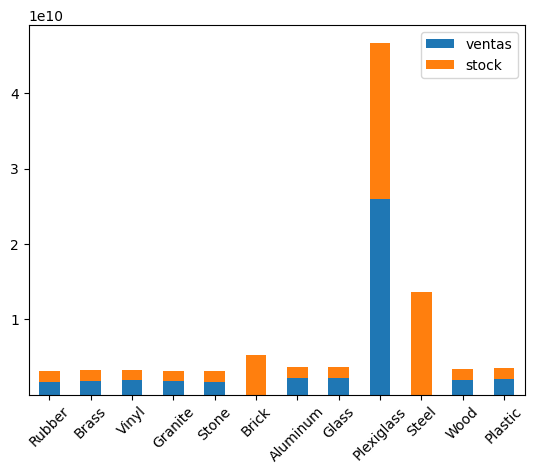

In [ ]:
# Mostramos los datos que queremos comparar.

productos = list(sales.columns[1:])
columnas2 = ["ventas","stock"]
ventas = []
stock = []


#Este bucle está iterando sobre las columnas de productos,
#calculando la suma de los valores en cada columna correspondiente de sales y exp,
#y agregando esos valores a las listas ventas y stock.
for col in productos:
  ventas.append(sales[col].sum())
  stock.append(exp[col].sum())


# Creamos un nuevo DataFrame
df = pd.DataFrame(data = np.transpose(np.array([ventas,stock])), index = np.array(productos), columns = np.array(columnas2))

print("Comparación de venta y stock + todos los distribuidores:")
display(df)
print()

print("----------------------------------------")
print("Visualización de la comparación por productos:")
print()

df[['ventas','stock']].plot(kind='bar' ,stacked= True)
plt.xticks(rotation=45)
plt.show()







El problema de estrategia de la empresa es notorio: hay una diferencia sustancial entre el stock y las ventas en los casos de los ladrillos y del acero. Se vendió muy poco a diferencia del pedido que ingresó de esos materiales.

Adicionalmente, todos los productores contaron con stock y todos mostraron ventas significativamente menores. Esto resulta más evidente cuando se comparan el total de ventas y stock por producto.



---


Para entender este desequilbrio en el stock de ladrillos y acero, es importante conocer el contexto. De esta forma, con el objetivo de encontrar una explicación, se entiende que si no se ve en la oferta de materiales de la compañía, entonces debería hallarse en la demanda.

Esta información la tenemos de la base de ubicaciones donde la compañía cuenta con distribuidores.

In [ ]:
print("Ubicación de los distribuidores de la compañia:")
display(location)

Ubicación de los distribuidores de la compañia:


,PYid,id,location,department,activities
4,7,409,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
45,11,523,Coronel Martínez,Guairá,"agriculture, livestock, hunting and related"
81,5,519,Guayaybi,San Pedro,"agriculture, livestock, hunting and related"
96,1,286,Itapé,Guairá,"agriculture, livestock, hunting and related, t..."
181,3,112,San Cosme y Damián,Itapúa,"agriculture, livestock, hunting and related, t..."
195,10,169,San Miguel,Misiones,craft production
200,9,402,San Pedro del Paraná,Itapúa,"agriculture, livestock, hunting and related"
226,4,102,Tobatí,Cordillera,"bricks, tiles and ceramics manufacture, craft ..."
239,2,387,Villa Hayes,Presidente Hayes,"commerce, steel,agriculture, livestock, huntin..."
246,8,42,Yaguarón,Paraguarí,"agriculture, livestock, hunting and related, t..."


Parece ser que los distribuidores se encuentran en pocas ciudades y las actividades económicas de esas ciudades se concentran principalmente en la agricultura, ganadería, caza, turismo y producción artesanal.

Estas actividades no son demandantes relevantes de materiales de construcción. En aquellas ciudades de Paraguay donde predominan actividades que sí demandan estos materiales, no se cuenta con distribuidores de la compañía.

Finalmente queda en evidencia que el error fue no realizar un estudio por localidad al momento de evaluar la demanda de materiales de construcción, antes de ubicar a sus distribuidores.